### Import all the dependencies

In [82]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np 

In [83]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Import data into tensorflow dataset object

In [23]:
import splitfolders

In [24]:
splitfolders.ratio('PLantVillage',output="dataset", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 6727 files [00:32, 205.57 files/s]


In [84]:
IMAGE_SIZE = 256
CHANNELS = 3

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip= True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=64,
        shuffle = True,
        class_mode="sparse"
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 5380 images belonging to 11 classes.


In [86]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Rice__bacterial_leaf_blight': 5,
 'Rice__brown_spot': 6,
 'Rice__healthy': 7,
 'Rice__leaf_blast': 8,
 'Rice__leaf_scald': 9,
 'Rice__narrow_brown_spot': 10}

In [87]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Rice__bacterial_leaf_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__leaf_blast',
 'Rice__leaf_scald',
 'Rice__narrow_brown_spot']

In [88]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch.shape)
    print(image_batch[0])
    break


(64, 256, 256, 3)
[[[0.5638435  0.51678467 0.5246278 ]
  [0.5591312  0.5120724  0.5199155 ]
  [0.5544189  0.5073601  0.51520324]
  ...
  [0.68695444 0.6438172  0.65950346]
  [0.663421   0.6202837  0.63597   ]
  [0.6730291  0.6298919  0.64557815]]

 [[0.55578244 0.5087236  0.51656675]
  [0.5610838  0.514025   0.5218681 ]
  [0.5663851  0.51932627 0.5271694 ]
  ...
  [0.6816531  0.63851583 0.6542021 ]
  [0.6622428  0.6191056  0.63479185]
  [0.6783305  0.6351932  0.6508795 ]]

 [[0.55019325 0.5031344  0.51097757]
  [0.54783714 0.5007783  0.50862145]
  [0.54548097 0.49842218 0.5062653 ]
  ...
  [0.6763518  0.63321453 0.6489008 ]
  [0.6610648  0.61792755 0.6336138 ]
  [0.6836318  0.6404945  0.6561808 ]]

 ...

 [[0.4942029  0.45106566 0.47459507]
  [0.56526566 0.5221284  0.5456578 ]
  [0.53534037 0.49220306 0.5157325 ]
  ...
  [0.6434476  0.61991817 0.63560444]
  [0.6393243  0.6157949  0.6314812 ]
  [0.63520104 0.6116716  0.6273579 ]]

 [[0.51010686 0.46696964 0.49049905]
  [0.56349856 0.520

In [89]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip= True
)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=64,
        shuffle = True,
        class_mode="sparse"
)

Found 671 images belonging to 11 classes.


In [90]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip= True
)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=64,
        shuffle = True,
        class_mode="sparse"
)

Found 676 images belonging to 11 classes.


In [92]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6822252  0.6508527  0.70183307]
  [0.69006467 0.6586921  0.7096725 ]
  [0.7017581  0.67038554 0.7213659 ]
  ...
  [0.47965223 0.42867184 0.46788752]
  [0.47916955 0.42818913 0.46740484]
  [0.47868684 0.42770645 0.46692213]]

 [[0.6819839  0.65061134 0.70159173]
  [0.6898233  0.6584508  0.7094312 ]
  [0.70139605 0.6700235  0.7210039 ]
  ...
  [0.48204592 0.4310655  0.4702812 ]
  [0.48216656 0.43118617 0.47040185]
  [0.48228723 0.43130684 0.47052252]]

 [[0.68174255 0.65037    0.7013504 ]
  [0.689582   0.65820944 0.70918983]
  [0.70103407 0.6696615  0.7206419 ]
  ...
  [0.47151503 0.42053464 0.45975032]
  [0.47115302 0.42017263 0.45938832]
  [0.47079098 0.4198106  0.45902628]]

 ...

 [[0.6120351  0.6002704  0.6747802 ]
  [0.6125178  0.60075307 0.67526287]
  [0.61300045 0.60123575 0.67574555]
  ...
  [0.47389197 0.43859786 0.5052646 ]
  [0.46513137 0.42983723 0.49650392]
  [0.44614324 0.41084912 0.4775158 ]]

 [[0.627451   0.6156863  0.6901961 ]
  [0.627451   0.6156863  0.6901961 ]


### Building the Model

In [99]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [100]:
from tensorflow.keras.regularizers import l2

In [101]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 11

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
   
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(rate = 0.5),

    layers.Dense(n_classes, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')
       
])

In [102]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,267 (719.79 KB)

 Trainable params: 184,267 (719.79 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [103]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [79]:
5380/64

84.0625

In [80]:
671/64

10.484375

In [130]:
history = model.fit(
    train_generator,
    steps_per_epoch=84,
    batch_size=64,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=1,
    epochs=50,
)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.9463 - loss: 0.1608 - val_accuracy: 0.9469 - val_loss: 0.2055
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9688 - loss: 0.0838 - val_accuracy: 0.9355 - val_loss: 0.0706
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.9148 - loss: 0.2963 - val_accuracy: 0.9391 - val_loss: 0.1601
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.0791 - val_accuracy: 0.9677 - val_loss: 0.0557
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9383 - loss: 0.2107 - val_accuracy: 0.9297 - val_loss: 0.1996
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9375 - loss: 0.1149 - val_accuracy: 0.9677 - val_loss: 0.0509
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9417 - loss: 0.1937 - val_accuracy: 0.9453 - val_loss: 0.1565
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9375 - loss: 0.0797 - val_accuracy: 0.9355 - val_l

In [149]:
scores = model.evaluate(test_generator)

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9635 - loss: 0.1064


In [150]:
scores

[0.1256026178598404, 0.9615384340286255]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [151]:
history

In [152]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 84}

In [153]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [154]:
type(history.history['loss'])

list

In [155]:
len(history.history['loss'])

50

In [156]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.16629894077777863,
 0.08282486349344254,
 0.28233596682548523,
 0.07820918411016464,
 0.25051629543304443]

In [157]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

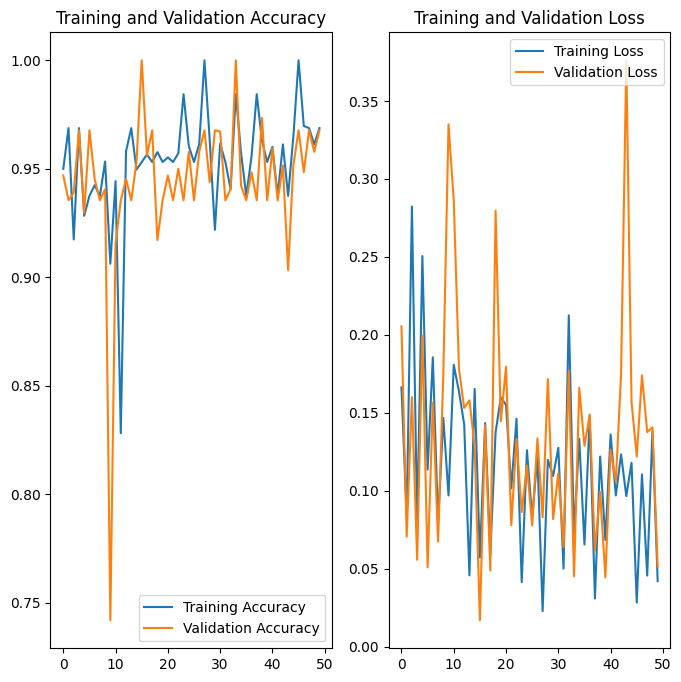

In [158]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Rice__leaf_blast
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
predicted label: Rice__leaf_blast


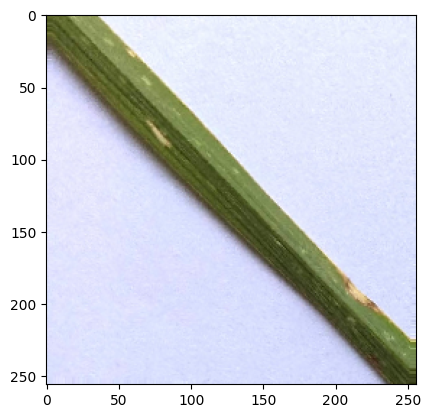

In [160]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Function for Inference

In [162]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


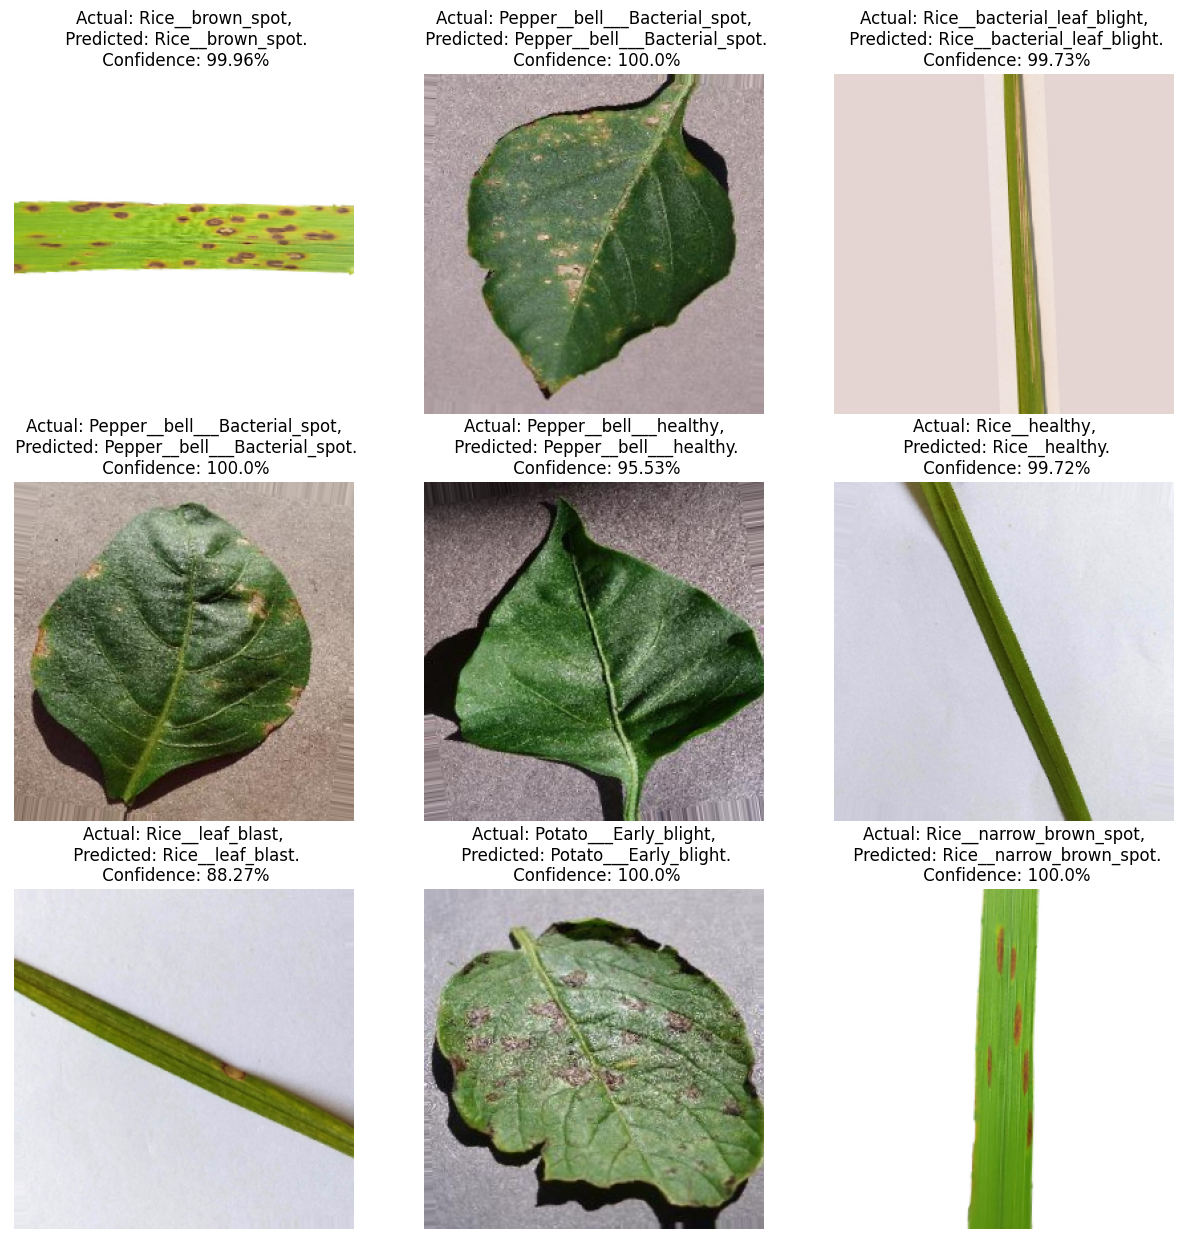

In [163]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [144]:
model.save("../plants_classification.h5")